# D.C. Residential Properties Dataset Analysis
### Team: Big Daddy Data

**Data Source**:

Dataset was downloaded from https://www.kaggle.com/christophercorrea/dc-residential-properties

**Introduction**

Dataset ready for analysis showing real property information, including most recent sales price as of July 2018, for properties located Washington, D.C.

**Columns in this Dataset**

|Column Name|Description|Type|
|--|--|--|
|ID|ID#|Int|
|BATHRM|Number of Full Bathrooms|Int|
|HF_BATHRM|Number of Half Bathrooms (no bathtub or shower)|Int|
|HEAT|Heating|String|
|AC|Cooling|String|
|NUM_UNITS|Number of Units|Int|
|ROOMS|Number of Rooms|Int|
|AYB|The earliest time the main portion of the building was built|Int|
|YR_RMDL|Year structure was remodeled|Int|
|EYB|The year an improvement was built more recent than actual year built|Int|
|STORIES|Number of stories in primary dwelling|Int|
|SALEDATE|Date of most recent sale|Timestamp|
|PRICE|Price of most recent sale|Int|
|QUALIFIED|Qualified|Boolean|
|SALE_NUM|Sale Number|Int|
|GBA|Gross building area in square feet|Int|
|BLDG_NUM|Building Number on Property|Int|
|STYLE|Style|String|
|STRUCT|Structure|String|
|GRADE|Grade|String|
|CNDTN|Condition|String|
|EXTWALL|Extrerior wall|String|
|ROOF|Roof type|String|
|INTWALL|Interior wall|String|
|KITCHENS|Number of kitchens|Int|
|FIREPLACES|Number of fireplaces|Int|
|USECODE|Property use code|Int|
|LANDAREA|Land area of property in square feet|Int|
|GIS_LAST_MOD_DTTM|Last Modified Date|Timestamp|
|SOURCE|Raw Data Source|String|
|CMPLX_NUM|Complex number|String|
|LIVING_GBA|Gross building area in square feet|String|
|FULLADDRESS|Full Street Address|String|
|CITY|City|String|
|STATE|State|String|
|ZIPCODE|Zip Code|Int|
|NATIONALGRID|Address location national grid coordinate spatial address|String|
|LATITUDE|Latitude|Int|
|LONGITUDE|Longitude|Int|
|ASSESSMENT_NBHD|Neighborhood ID|String|
|ASSESSMENT_SUBNBHD|Subneighborhood ID|String|
|CENSUS_TRACT|Census tract|Int|
|CENSUS_BLOCK|Census block|String|
|WARD|Ward (District is divided into eight wards, each with approximately 75,000 residents)|String|
|SQUARE|Square (from SSL)|Int|
|X|longitude|Int|
|Y|latitude|Int|
|QUADRANT|City quadrant (NE,SE,SW,NW)|String|

## Questions one could ask and find answers to from this dataset:
* Is there a model to predict the sale price of residental properties in D.C?
* What's the most relevant parameters to build up the model?
* Is demographic data relevant to the sale price?
* Which area has the most expensive and which area has the least properties price?
* What's the properties sales trend in the last ten years?
* Create a graphic map using longtitude and latitude to indicate the saleprice of different area.

### Datasource

In [2]:
data = "gs://is843_erli/notebooks/data/"

### Loading the data into a Spark DataFrame
Verify the datasource:

In [3]:
!gsutil ls {data + "DC_Properties.csv"}

gs://is843_erli/notebooks/data/DC_Properties.csv


Create dataframe by using inferred schema:

In [ ]:
df = spark.read.format("csv")\
  .option("header", "true")\
  .option("inferSchema", "true")\
  .load(data + "DC_Properties.csv")

df.printSchema()

Show first 5 rows of the dataset:

In [ ]:
df.show(5, False)

## Data Proofiling

Cacheing and partition the Dataframe

In [ ]:
df = df.repartition(20)
print("data was re-partitioned to {} partitions!".format(crimes.rdd.getNumPartitions()))
spark.conf.set("spark.sql.shuffle.partitions", "20")
df.cache()

Number of rows in data set

In [ ]:
df.count()

Dropping columns that we will not be using in our analysis

In [ ]:
df = df.drop('CITY', 'STATE')

Dropping duplicates

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.count()

Summary of the column PRICE and ROOMS using describe()

In [ ]:
df.describe(['PRICE','ROOMS']).show()

Average price grouped by rooms?

In [ ]:
df.groupBy("ROOMS").avg("PRICE").orderBy("ROOMS").show()

Date range of house

In [ ]:
df.selectExpr("min(EYB)", "max(EYB)").show()

Average price grouped by LAND AREA?

In [ ]:
df.groupBy("LANDAREA").avg("PRICE").orderBy("LANDAREA").show()

Average price grouped by Source of house and Condition?

In [ ]:
df.groupBy("SOURCE","CNDTN").avg("PRICE").show()

Average price grouped by Quadrant of house location in washington DC city?

In [ ]:
df.groupBy("QUADRANT").avg("PRICE").show()

How many house types are there based on Structure?

In [ ]:
df.select("STRUCT").distinct().count()

In [ ]:
df.groupBy("STRUCT", "STYLE").count().orderBy("STYLE").show()

Comparison of house price based on year and strcuture type

In [ ]:
df.where("EYB > 1980").groupBy("STRUCT").avg("PRICE").show()

In [ ]:
df.where("EYB < 1980").groupBy("STRUCT").avg("PRICE").show()

### Visualization

Installing Panda

In [ ]:
!conda install pandas

Find the trends for property sales by analysis the total sales count, average price and totoal sales value by each year

In [92]:
from pyspark.sql import functions as F

sales_for_each_year = df.groupBy(F.year("SALEDATE").alias("Year"))\
                        .agg(F.count("ID").alias("sales_count"),F.avg("PRICE").alias("avg_price"), F.sum("PRICE").alias("total_sales_amount"))\
                        .where(F.col("Year") >= 2000)\
                        .where(F.col("Year") <= 2017)\
                        .where(F.col("Year") != 2007)\
                        .orderBy(F.desc("Year"))
sales_for_each_year.show()

+----+-----+------------------+---------------+
|Year|count|         avg_price|    total_sales|
+----+-----+------------------+---------------+
|2017|12399| 754478.6438944569|   7.37729218E9|
|2016|10491| 648541.7989875294|   5.25254003E9|
|2015| 9578|1495214.6887961216|1.1103464279E10|
|2014| 8635| 635945.9630867386|  4.186432275E9|
|2013| 8136| 602606.5104651162|  3.627691193E9|
|2012| 6593| 554010.0291909925|    2.6570321E9|
|2011| 5658| 532311.8999751799|  2.144684645E9|
|2010| 5505| 561583.3860622137|  2.328886302E9|
|2009| 5166| 482791.6462904911|  1.848126422E9|
|2008| 4772|512125.38417910447|  1.715620037E9|
|2007| 5973| 8148047.249250634| 3.533808092E10|
|2006| 5263|487862.33897856576|  1.843631779E9|
|2005| 5882|498257.22329411766|  2.117593199E9|
|2004| 4949| 403180.0269975457|  1.478461159E9|
|2003| 4316|357727.10807204805|   1.07246587E9|
|2002| 3460|  304200.144036009|   8.10997584E8|
|2001| 3075|277366.51245847176|   6.67898562E8|
|2000| 3061|239205.79972311953|   5.1835

In [93]:
py_dc_data = sales_for_each_year.toPandas()
py_dc_data.head()

,Year,count,avg_price,total_sales
0,2017,12399,7.544786e+05,7.377292e+09
1,2016,10491,6.485418e+05,5.252540e+09
2,2015,9578,1.495215e+06,1.110346e+10
3,2014,8635,6.359460e+05,4.186432e+09
4,2013,8136,6.026065e+05,3.627691e+09


Use *matplotlib* for plotting

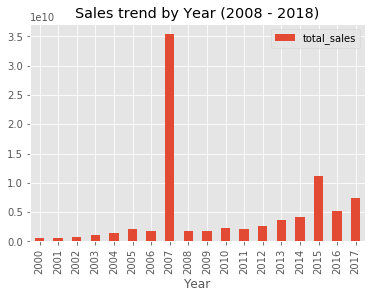

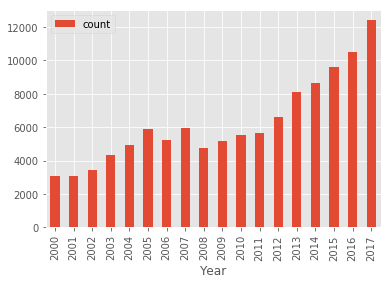

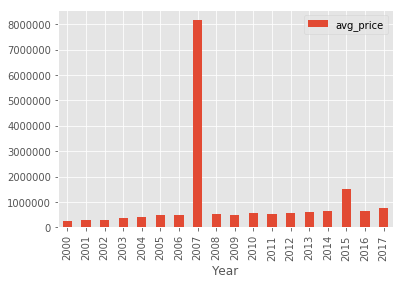

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df1 = py_dc_data.set_index('Year')
df1[["sales_count" ]].plot.bar().invert_xaxis()
plt.title('Sales trend by Year (2008 - 2018)')
df1[["avg_price" ]].plot.bar().invert_xaxis()
df1[["total_sales_amount" ]].plot.bar().invert_xaxis()

## Sampling & Scatterplot
sample 0.1% of the data to plot a scatterplot:

In [ ]:
df_sample = df.sample(withReplacement = False, fraction = 0.001, seed = 8)

# Convert to Pandas
py_df_sample = df_sample.toPandas()

py_df_sample.head()

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(py_df_sample['X'], py_df_sample['Y'], alpha=0.05)

<img src="https://raw.githubusercontent.com/elieric/is843/master/DC-Ward-Public-Trans.jpg" width="300" align="left"/>